In [1]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Carrega o conjunto de dados MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Seleciona alguns dados
num_samples = 30000
X = X[:num_samples]

In [3]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)


In [4]:
num_clusters = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95 , 100, 110, 120, 130, 140, 150, 160, 170, 180]
silhouette_scores = []
inertia_values = []

for n_clusters in num_clusters:
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertia_values.append(kmeans.inertia_)

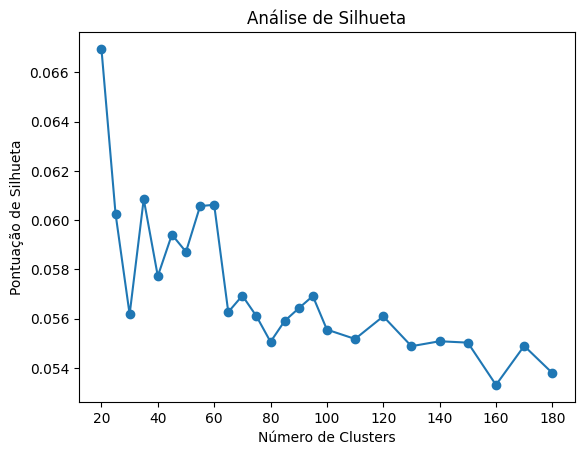

In [5]:
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação de Silhueta')
plt.title('Análise de Silhueta')
plt.show()


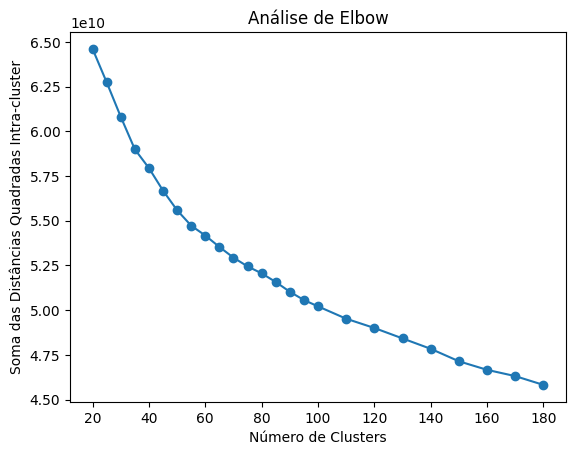

In [6]:
plt.plot(num_clusters, inertia_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias Quadradas Intra-cluster')
plt.title('Análise de Elbow')
plt.show()
